In [97]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import torch

In [106]:
target = 'Van Gogh'
root = f'../results_attn_val/results_seed_0/stable-diffusion/runwayml/stable-diffusion-v1-5/{target}'
base_pt = os.path.join(root, 'base_norms.pt')
base_norms = torch.load(base_pt)
target_pt = os.path.join(root, 'target_norms.pt')
target_norms = torch.load(target_pt)
if not os.path.exists(os.path.join(root, 'plots')):
    os.makedirs(os.path.join(root, 'plots'))

In [104]:
T = 51
n_layers = 16

In [ ]:



for t in range(T):
    print("Timestep T")
    # make a plot of 4 x 4
    fig, axs = plt.subplots(4, 4, figsize=(20, 20))
    for i in range(4):
        for j in range(4):
            n = i * 4 + j
            base = base_norms[t][n]
            target = target_norms[t][n]
            # select top - 1% of the norms
            top = 0.01
            # select top 1% neurons of target 
            indices = np.argsort(target)
            indices = indices[-int(len(indices) * top):]
            base = base[indices]
            target = target[indices]
            # plot hgaussian with sns kdeplot
            sns.kdeplot(base, color='blue', linestyle='-', label='Non-memorized', shade=True, ax=axs[i, j])
            sns.kdeplot(target, color='red', linestyle='-', label='Memorized', shade=True, ax=axs[i, j])
            # set fontsize of the y axis to 10
            # axs[i, j].tick_params(axis='both', which='major', labelsize=15)
            # set fontsize of the x axis to 10
            axs[i, j].set_xlabel('Norm', fontsize=15)
            # set fontsize of the y axis to 10
            axs[i, j].set_ylabel('Density', fontsize=15)

            axs[i, j].set_title(f'Layer {n}', fontsize=20)
            # add legend to every plot fontsize of 10
            axs[i, j].legend(fontsize=15)
    plt.suptitle(f'Timestep {t}', fontsize=25)
    plt.tight_layout()
    plt.savefig(os.path.join(root, 'plots', f't_{t}.png'))


/tmp/ipykernel_3481379/914882218.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base, color='blue', linestyle='-', label='Reference', shade=True, ax=axs[i, j])
/tmp/ipykernel_3481379/914882218.py:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(target, color='red', linestyle='-', label='Target', shade=True, ax=axs[i, j])
/tmp/ipykernel_3481379/914882218.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base, color='blue', linestyle='-', label='Reference', shade=True, ax=axs[i, j])
/tmp/ipykernel_3481379/914882218.py:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This wil

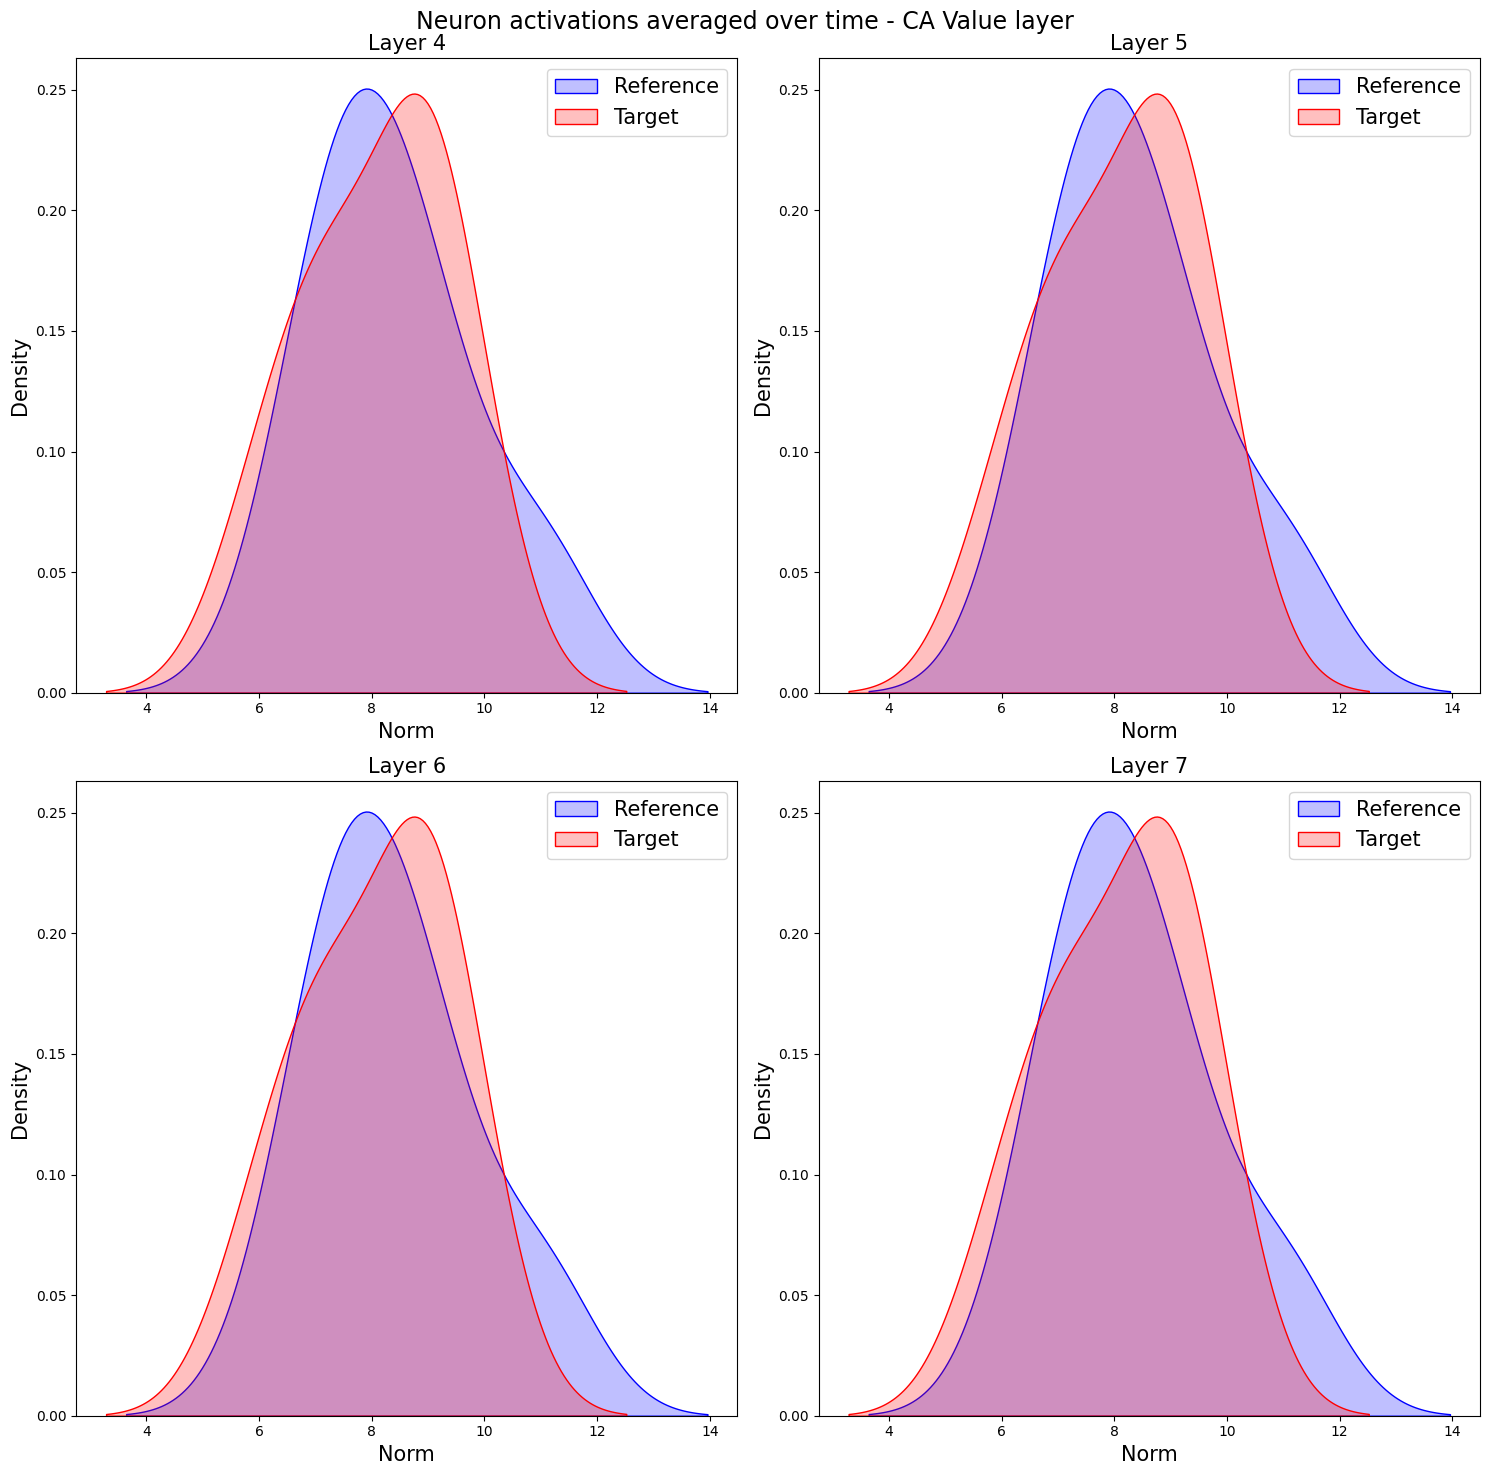

In [107]:
# take average activation of the neuron over time
avg_base = {}
avg_target = {}

for l in range(n_layers):
    avg_b = 0
    avg_t = 0
    for t in range(T):
        avg_b += base_norms[t][l]
        avg_t += target_norms[t][l]
    avg_base[l] = avg_b / T
    avg_target[l] = avg_t / T

# plot the average activation of the neuron over time
# plot of 3 x 1
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
# add space between title and plot
# plt.subplots_adjust(top=1.9)

layer_ids = [4,5,6,7]
for i in range(2):
    for j in range(2):
        n = i * 2 + j

        l = layer_ids[n]
        base = avg_base[l]
        target = avg_target[l]
        # select top - 1% of the norms
        top = 0.01
        # select top 1% neurons of target 
        indices = np.argsort(target)
        indices = indices[-int(len(indices) * top):]
        base = base[indices]
        target = target[indices]
        # plot hgaussian with sns kdeplot
        sns.kdeplot(base, color='blue', linestyle='-', label='Reference', shade=True, ax=axs[i, j])
        sns.kdeplot(target, color='red', linestyle='-', label='Target', shade=True, ax=axs[i, j])
        # set fontsize of the y axis to 10
        # axs[i, j].tick_params(axis='both', which='major', labelsize=15)
        # set fontsize of the x axis to 10
        axs[i, j].set_xlabel('Norm', fontsize=15)
        # set fontsize of the y axis to 10
        axs[i, j].set_ylabel('Density', fontsize=15)

        axs[i, j].set_title(f'Layer {l}', fontsize=15)
        

        # add legend to every plot fontsize of 10
        axs[i, j].legend(fontsize=15)
plt.suptitle(f'Neuron activations averaged over time - CA Value layer', fontsize=17)
plt.tight_layout()
plt.savefig(os.path.join(root, 'plots', f'avg.pdf'))
